In [21]:
import numpy as np
import pandas as pd
import pickle
import glob
from pathlib import Path
import re
import matplotlib.pyplot as plt

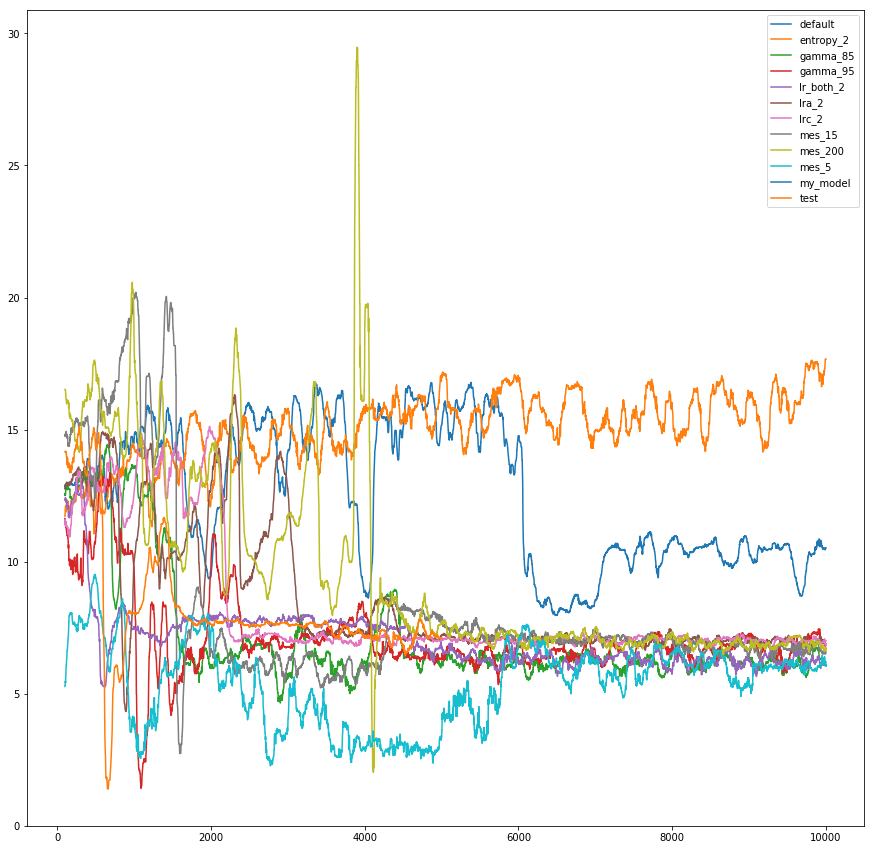

In [43]:
data = {}
for filename in Path('models').glob('**/global.data'):
    model_name = re.search(r".*/(.*)/global.data",str(filename)).group(1)
    with open(filename, 'rb') as f:
        global_data = pickle.load(f)
        rewards = global_data["global_rewards"]
        data[model_name] = pd.Series(rewards)
df = pd.DataFrame(data)

plt.figure(figsize=(15,15))
for model_name, rewards in df.iteritems():
    x = rewards.rolling(window=100).median()
    plt.plot(x, label=model_name)
    plt.legend()

default  entropy_2   gamma_85   gamma_95  lr_both_2      lra_2  \
0  13.496130  12.248650  11.756692  11.620425  12.677889   4.060881   
1  13.085668  10.344419   5.779541  11.964269  14.567943  11.265562   
2  13.418289  10.390507  15.117912   9.876560   9.632632   4.884410   
3   6.973361  11.259174   7.471236  13.364947   7.452466  12.662010   
4  13.503451   9.526629   9.041506  13.624318  11.751186  13.116360   

       lrc_2     mes_15    mes_200     mes_5   my_model       test  
0  10.262296  11.578689  22.198092  5.567848   5.805786  12.513028  
1   2.541907  16.043570  17.138499  3.538765   9.442602  13.221954  
2   7.559057  11.312718  18.965453  3.066283  14.018495  14.726220  
3  15.715292  11.158714  14.785990  6.671768  14.053894  19.035632  
4  14.061025  12.636655  16.776668  3.568970  14.542551  12.448040